In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import poisson


In [3]:
df = pd.read_csv("data/Car_sale_ads.csv")
list(df.columns)
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [4]:
price = df["Price"].copy()
currency = df["Currency"].copy()

for idx, (p, c) in enumerate(zip(price, currency)):
    if c == "EUR":
        price_PLN = p * 4.6
        price[idx] = price_PLN
        currency[idx] = "PLN"


df["Currency"] = currency
df["Price"] = price


cols2add = ["Price", "Condition", "Vehicle_brand", "Vehicle_model", "Vehicle_version","Vehicle_generation", "Production_year", "Mileage_km", "Power_HP", "Displacement_cm3", "Fuel_type"]
test_df = df[cols2add]

In [5]:
test_df.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,86200.0,New,Abarth,595,NaN,NaN,2021,1.0,145.0,1400.0,Gasoline
1,43500.0,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,1100.0,Gasoline
2,44900.0,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,1368.0,Gasoline
3,39900.0,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,1368.0,Gasoline
4,97900.0,New,Abarth,595,NaN,NaN,2021,600.0,165.0,1368.0,Gasoline


In [6]:
audi_cars = test_df[test_df['Vehicle_brand'] == "Audi"]
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()

In [7]:
data_normalized = audi_a3_2000ccm
data_normalized['Production_year'] = (data_normalized['Production_year']-data_normalized['Production_year'].mean())/data_normalized['Production_year'].std()
data_normalized['Mileage_km'] = (data_normalized['Mileage_km']-data_normalized['Mileage_km'].mean())/data_normalized['Mileage_km'].std()
data_normalized.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
1929,49900.0,Used,Audi,A3,2.0 TDI Attraction,8V (2012-),1.294488,0.094898,150.0,1968.0,Diesel
1932,13900.0,Used,Audi,A3,2.0 TDI Sportback DPF,8P (2003-2012),-0.388708,0.359536,140.0,1968.0,Diesel
1934,19900.0,Used,Audi,A3,2.0 TDI DPF Attraction,8P (2003-2012),-0.629165,0.568460,170.0,1968.0,Diesel
1941,13500.0,Used,Audi,A3,2.0 TDI Ambiente DSG,8P (2003-2012),-1.350534,0.665958,140.0,1968.0,Diesel
1943,66900.0,Used,Audi,A3,2.0 TDI clean diesel Attraction,8V (2012-),1.534945,-2.036133,150.0,1968.0,Diesel


In [9]:
import matplotlib.pyplot as plt
def price_plot(df, column_name):
    price = df["Price"]
    data = df[column_name]
    plt.plot(data,price, 'o')
    plt.xlabel(column_name)
    plt.ylabel("Price_PLN")
    # z = np.polyfit(data, price, 1)
    # p = np.poly1d(z)
    # print(p)
    # plt.plot(data, p(data))

def plot_mean(df, column_name, round_it=False):
    if round_it:
        df = df.round(-1)
    mean_values = df.groupby(column_name)['Price'].mean()

    # Plotting the mean values
    mean_values.plot()

    # Adding labels and title to the plot
    plt.xlabel(column_name)
    plt.ylabel('Price_PLN')
    plt.title("Mean price of car by category")

#price_plot(audi_a3_cars, "Mileage_km")

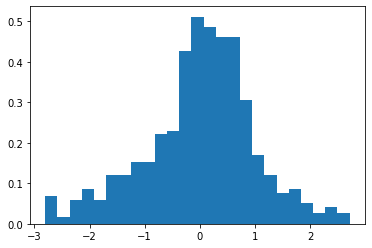

In [14]:
plt.figure()
plt.hist(data_normalized["Mileage_km"], bins = 25, density=True)
plt.show()

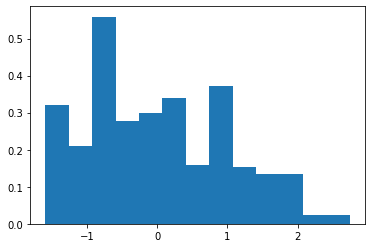

In [23]:
plt.figure()
plt.hist(data_normalized["Production_year"], bins = 13, density=True)
plt.show()

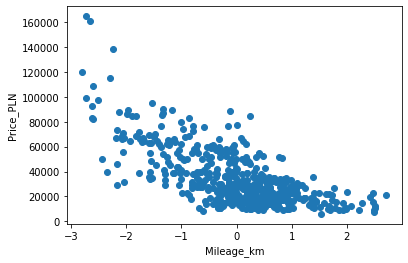

In [11]:
price_plot(data_normalized, 'Mileage_km')